In [1]:
#2

In [2]:
#Importing necessary libraraies
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.shape

(571, 43)

In [6]:
d=df.dtypes
d

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [8]:
#We observe that we have 43 cols and 571 rows. 
#Seat_No is nominal hence will drop
#1-41 are features and 42 is target
# We have null values. Since its categorical we will use mode for filling them. 
# Since target is in float we will see it as a regression model based problem.
# HS-105/12 and HS-205/20 dont follow the pattern of rest columns. hence we will remove/ followed by nos.

In [9]:
df.rename(columns ={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [10]:
df.drop(['Seat No.'],axis=1,inplace = True)

In [11]:
# Finding null values:

df.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

In [12]:
new_df= df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
new_df.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [14]:
#We have successfully removed null

PH-121


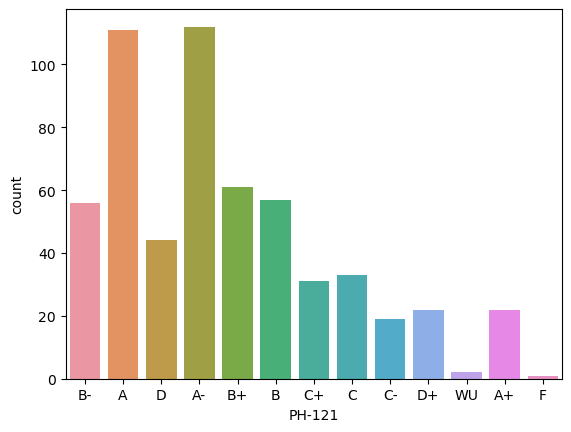

HS-101


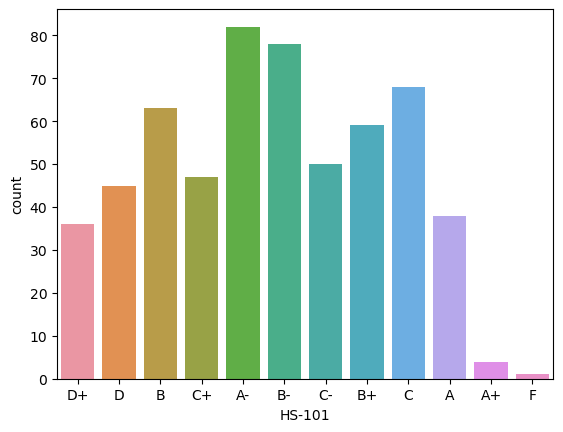

CY-105


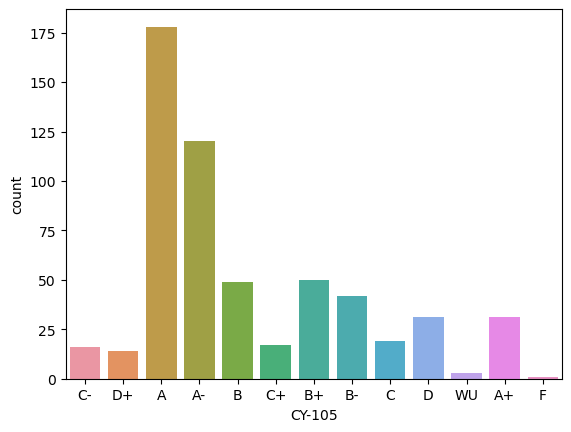

HS-105


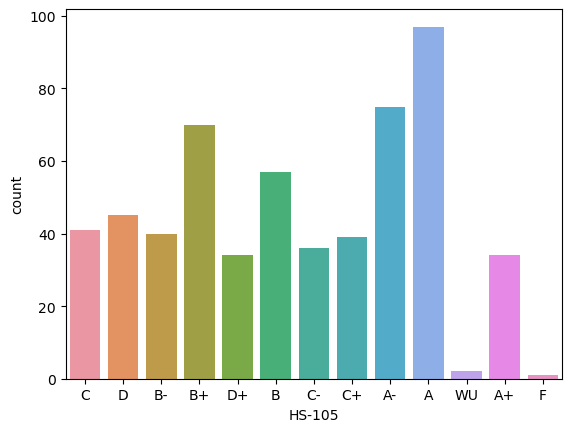

MT-111


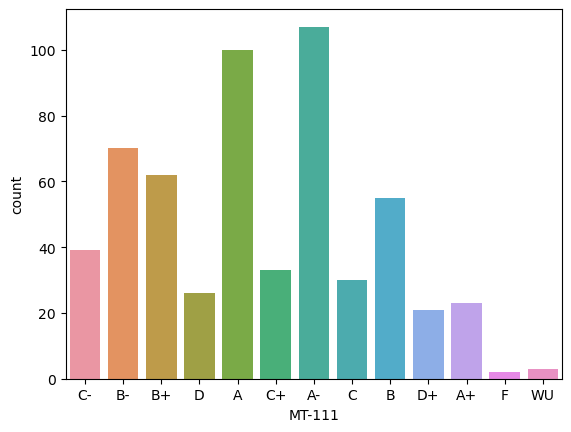

CS-105


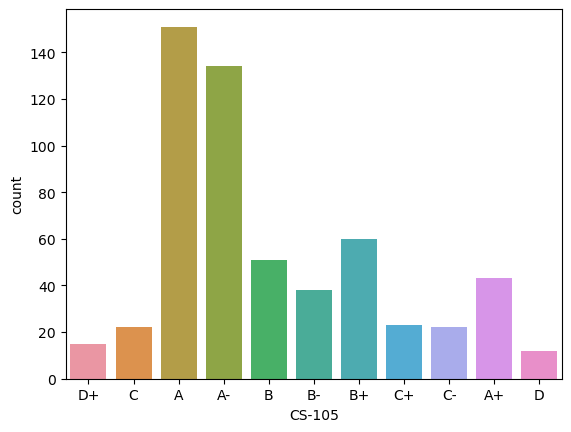

CS-106


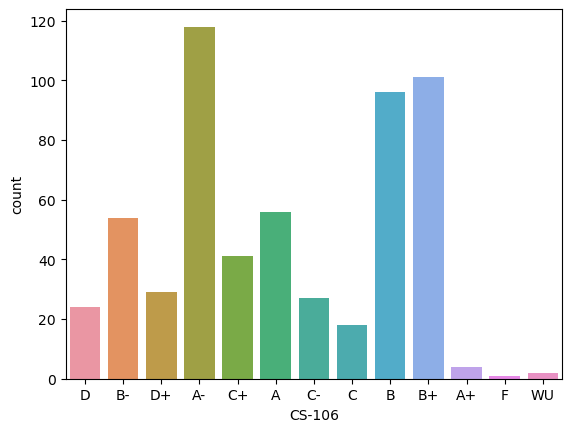

EL-102


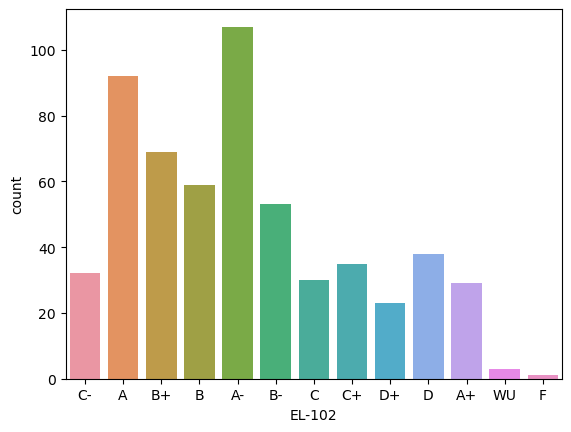

EE-119


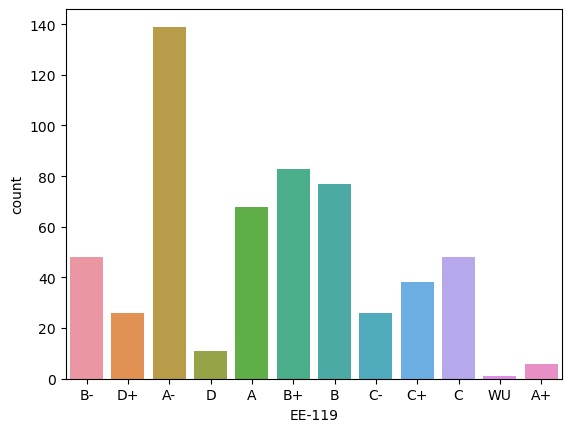

ME-107


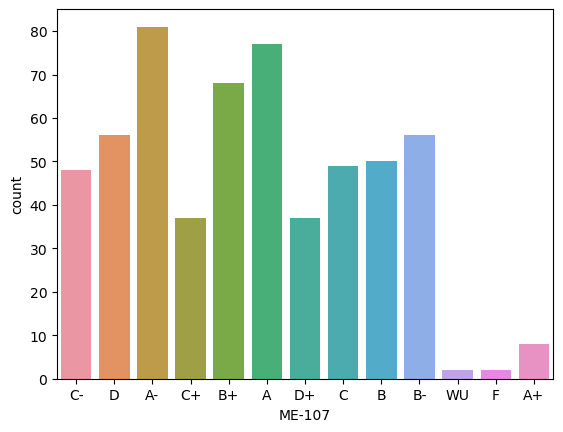

CS-107


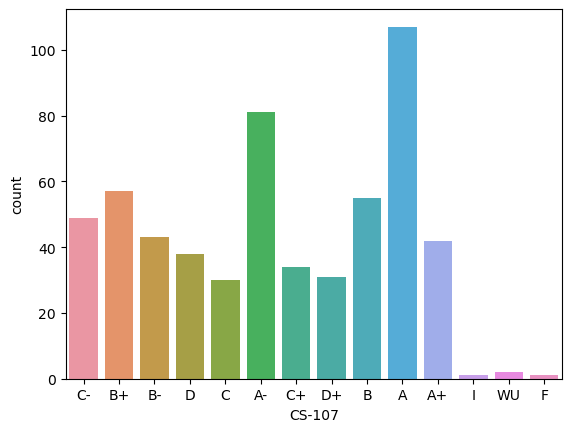

HS-205


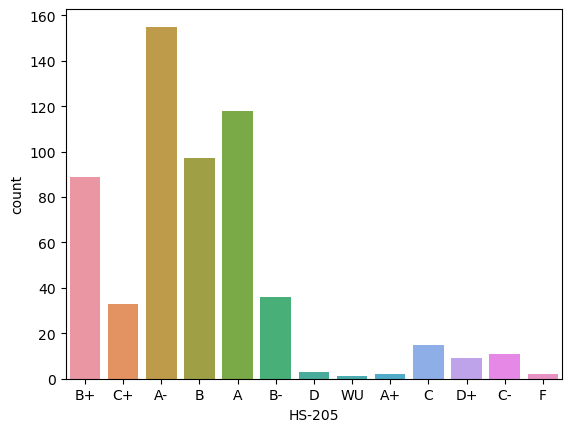

MT-222


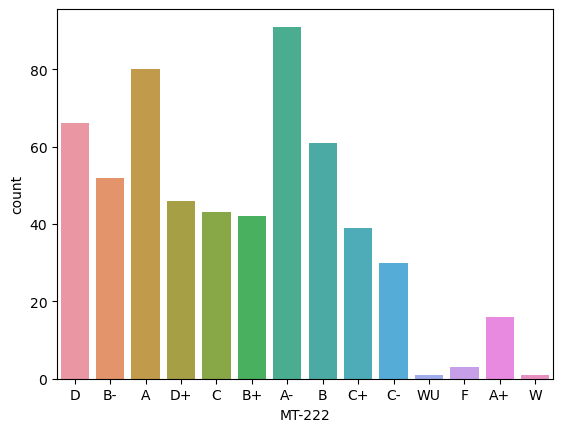

EE-222


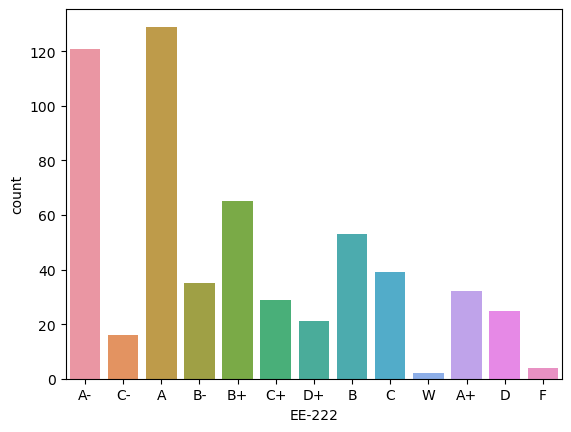

MT-224


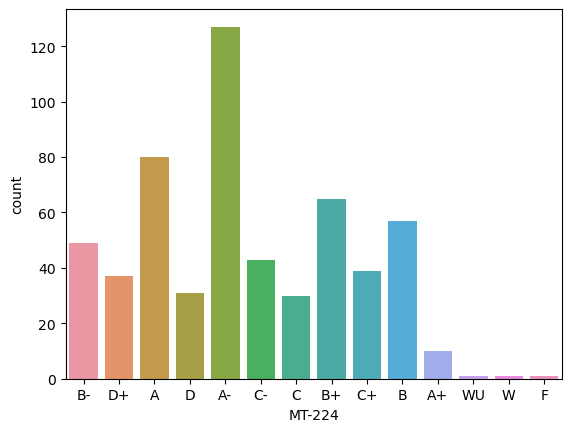

CS-210


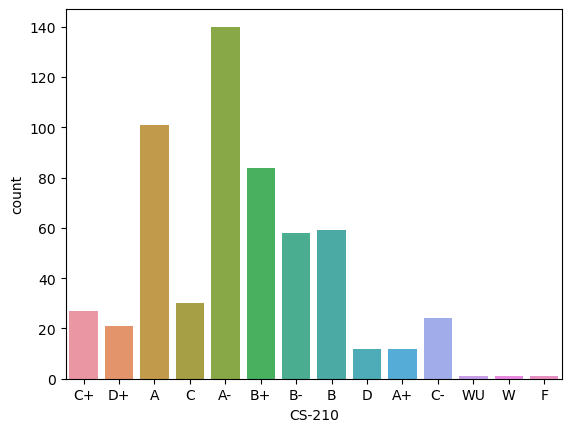

CS-211


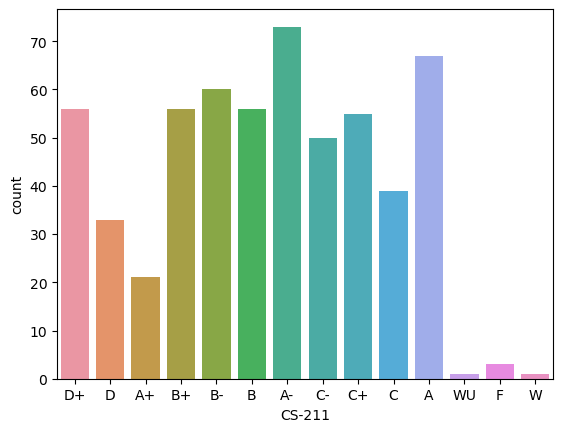

CS-203


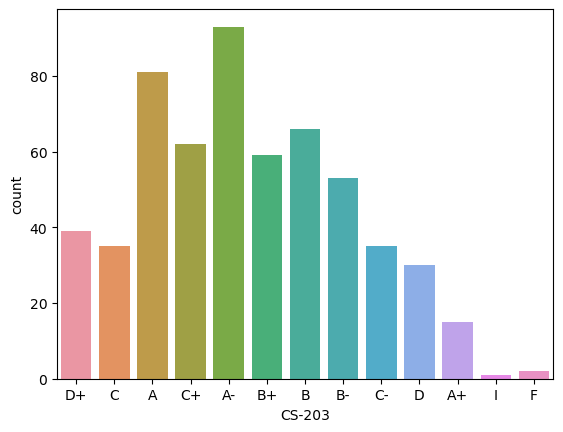

CS-214


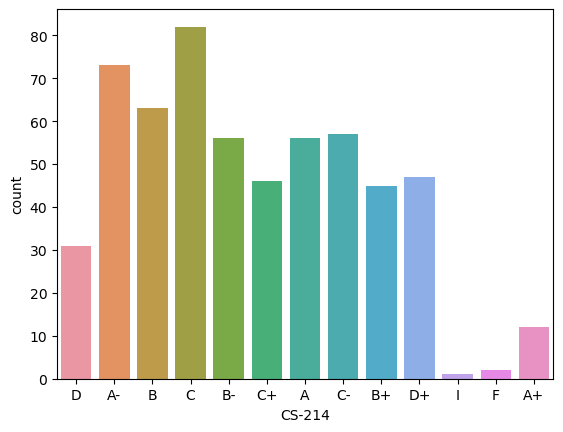

EE-217


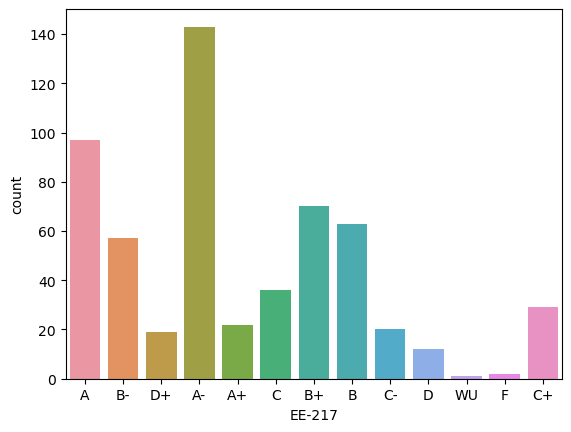

CS-212


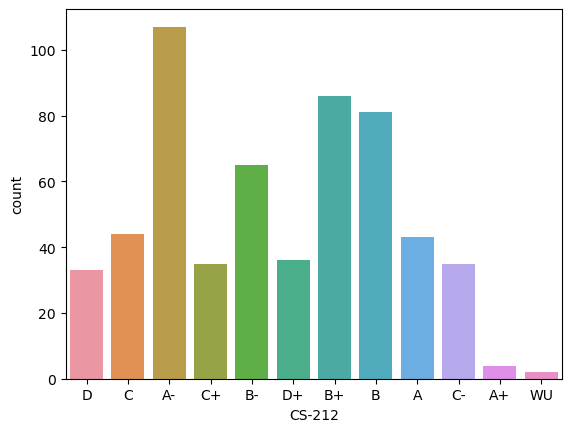

CS-215


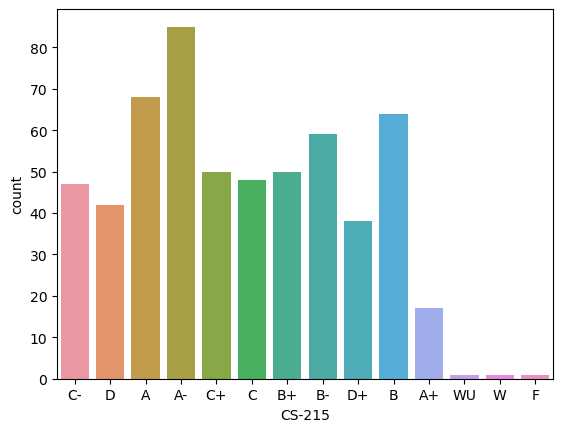

MT-331


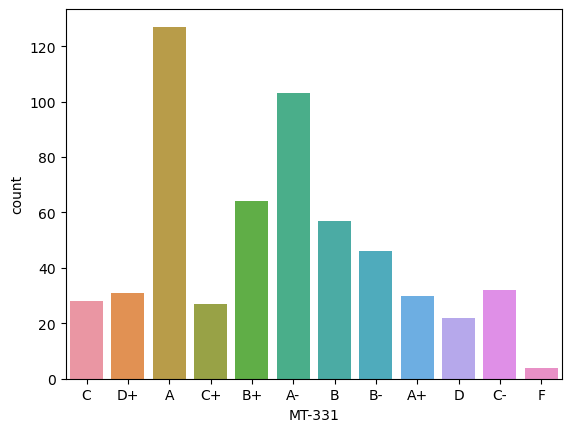

EF-303


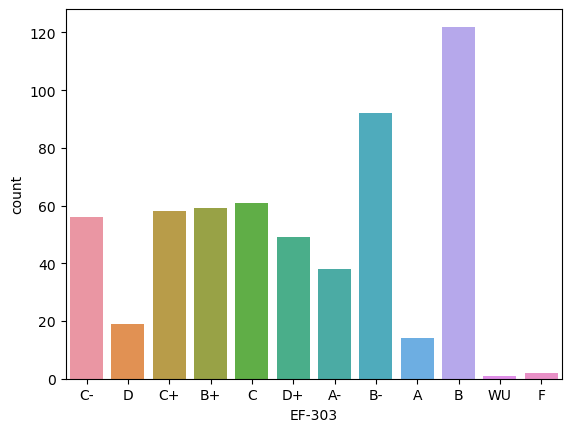

HS-304


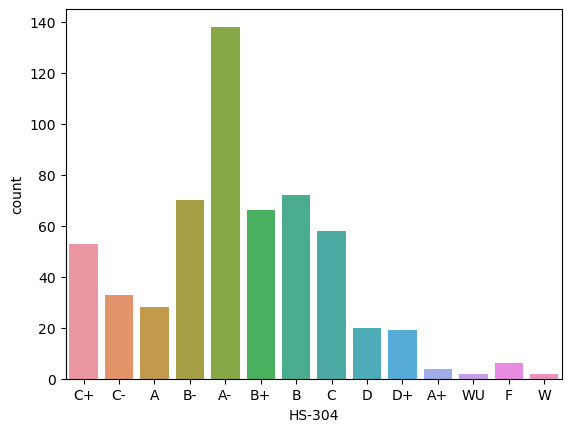

CS-301


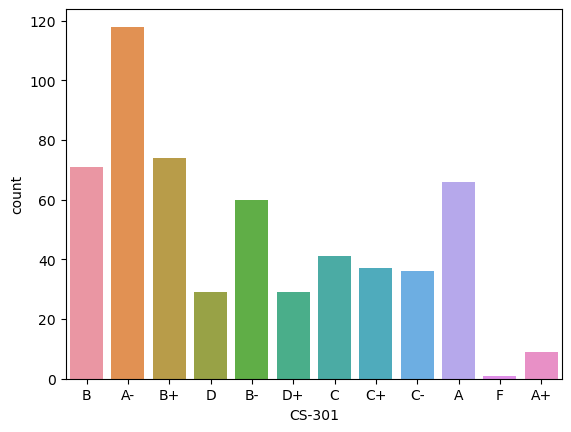

CS-302


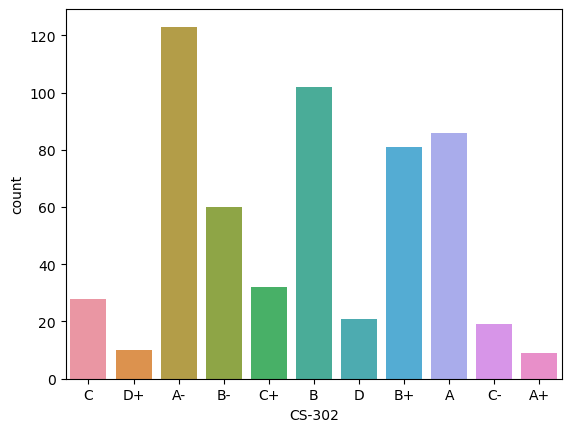

TC-383


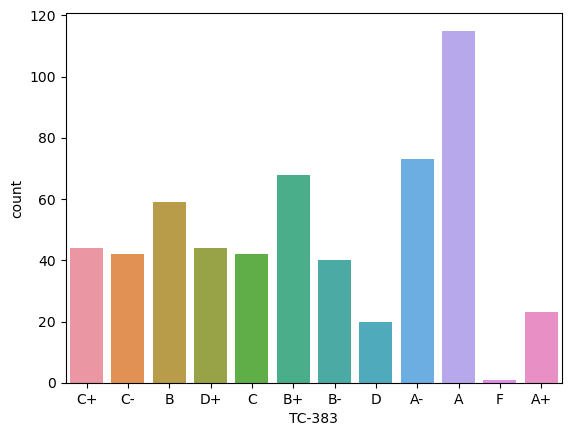

MT-442


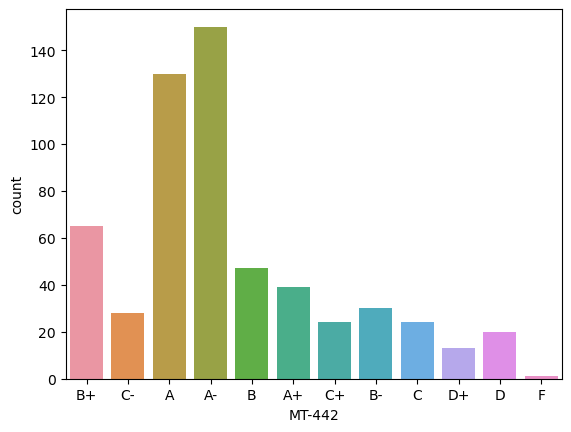

EL-332


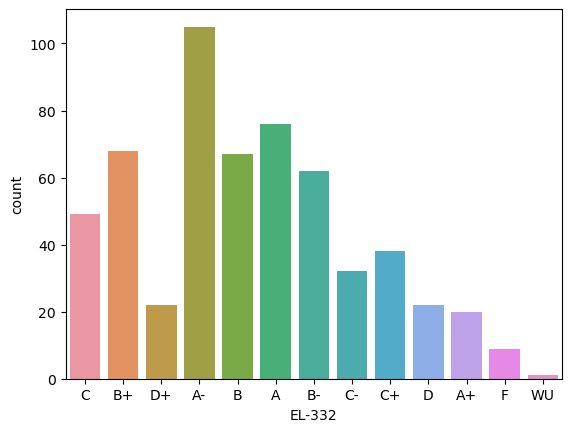

CS-318


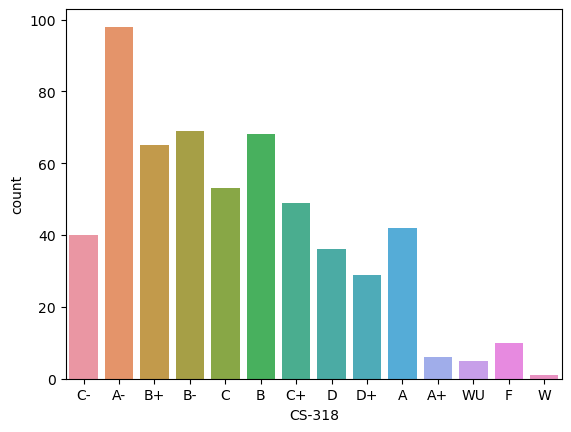

CS-306


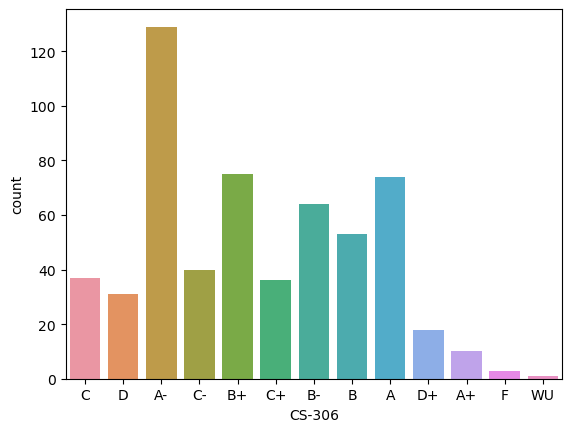

CS-312


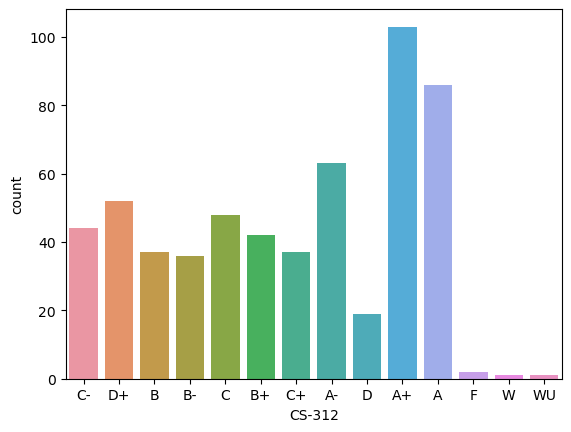

CS-317


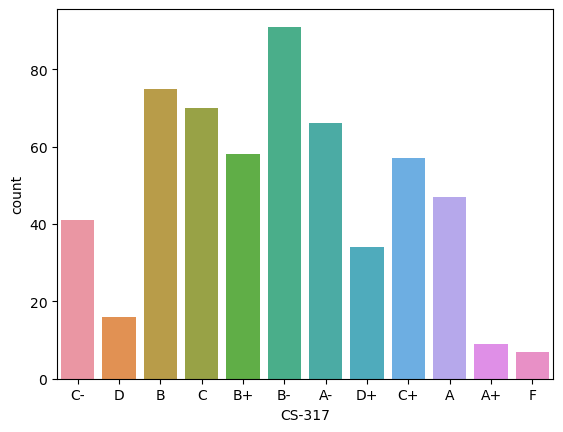

CS-403


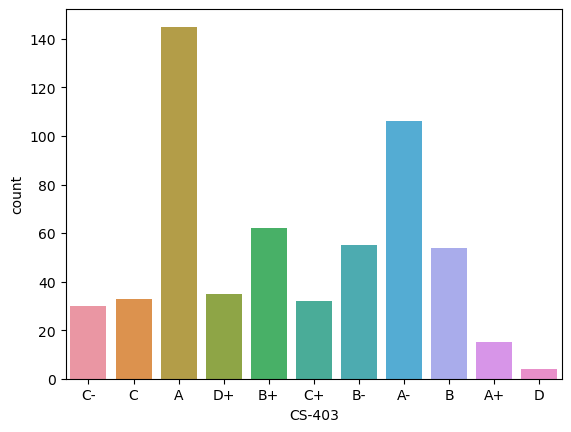

CS-421


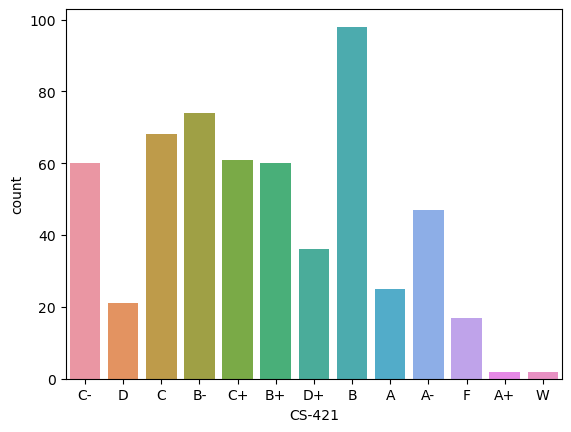

CS-406


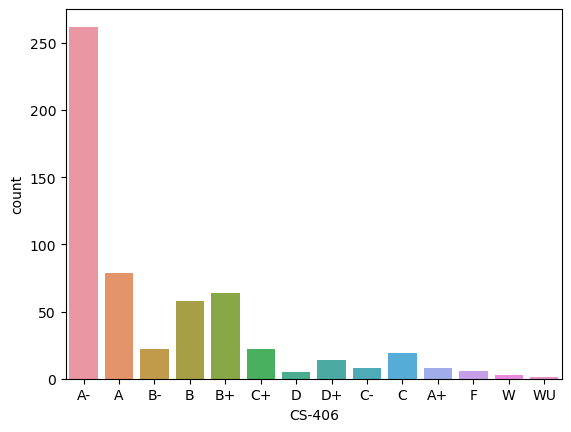

CS-414


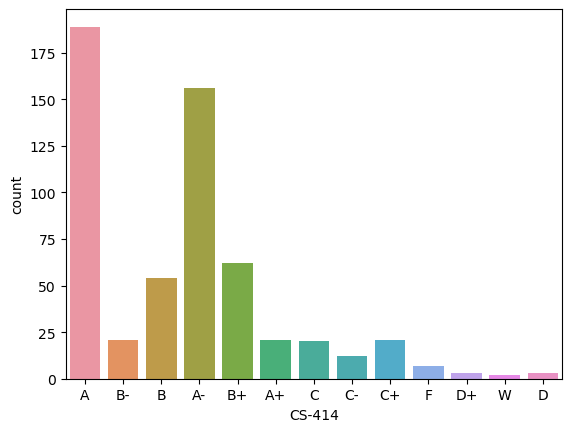

CS-419


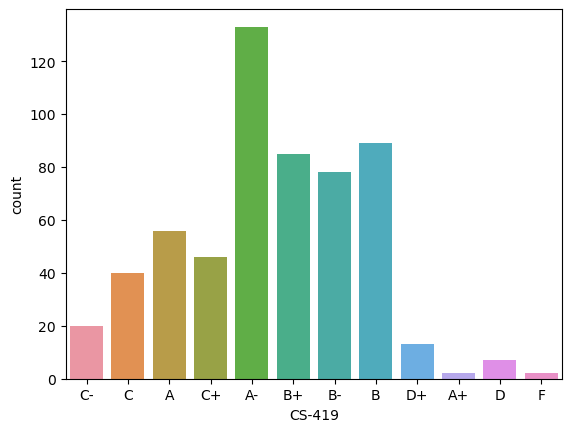

CS-423


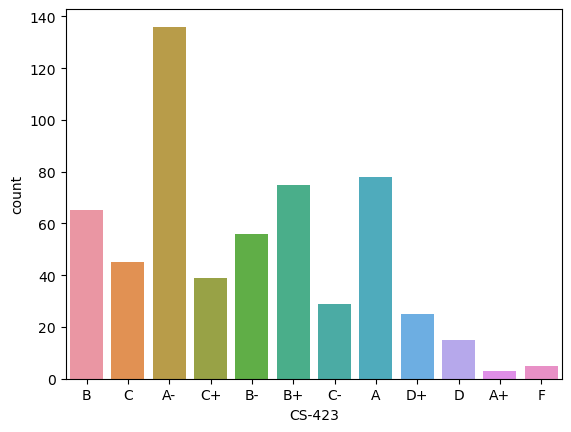

CS-412


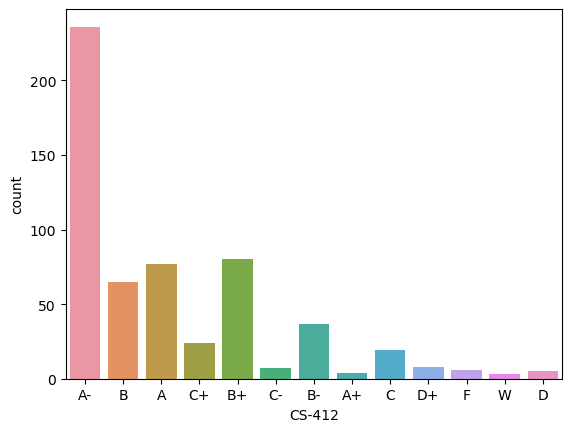

In [15]:
#Now we will see each feature has how many unique values
Count=['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for i in Count:
    print(str(i))
    sns.countplot(new_df[i])
    plt.show()

In [16]:
#Since our features have object datatype we will encode it to numeric value
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
for i in new_df.drop(['CGPA'],axis=1):
    new_df[i]=le.fit_transform(new_df[i])
new_df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [17]:
new_df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [18]:
#Now we will understand correlation of all features with target and also among them.

In [19]:
new_df.corr()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


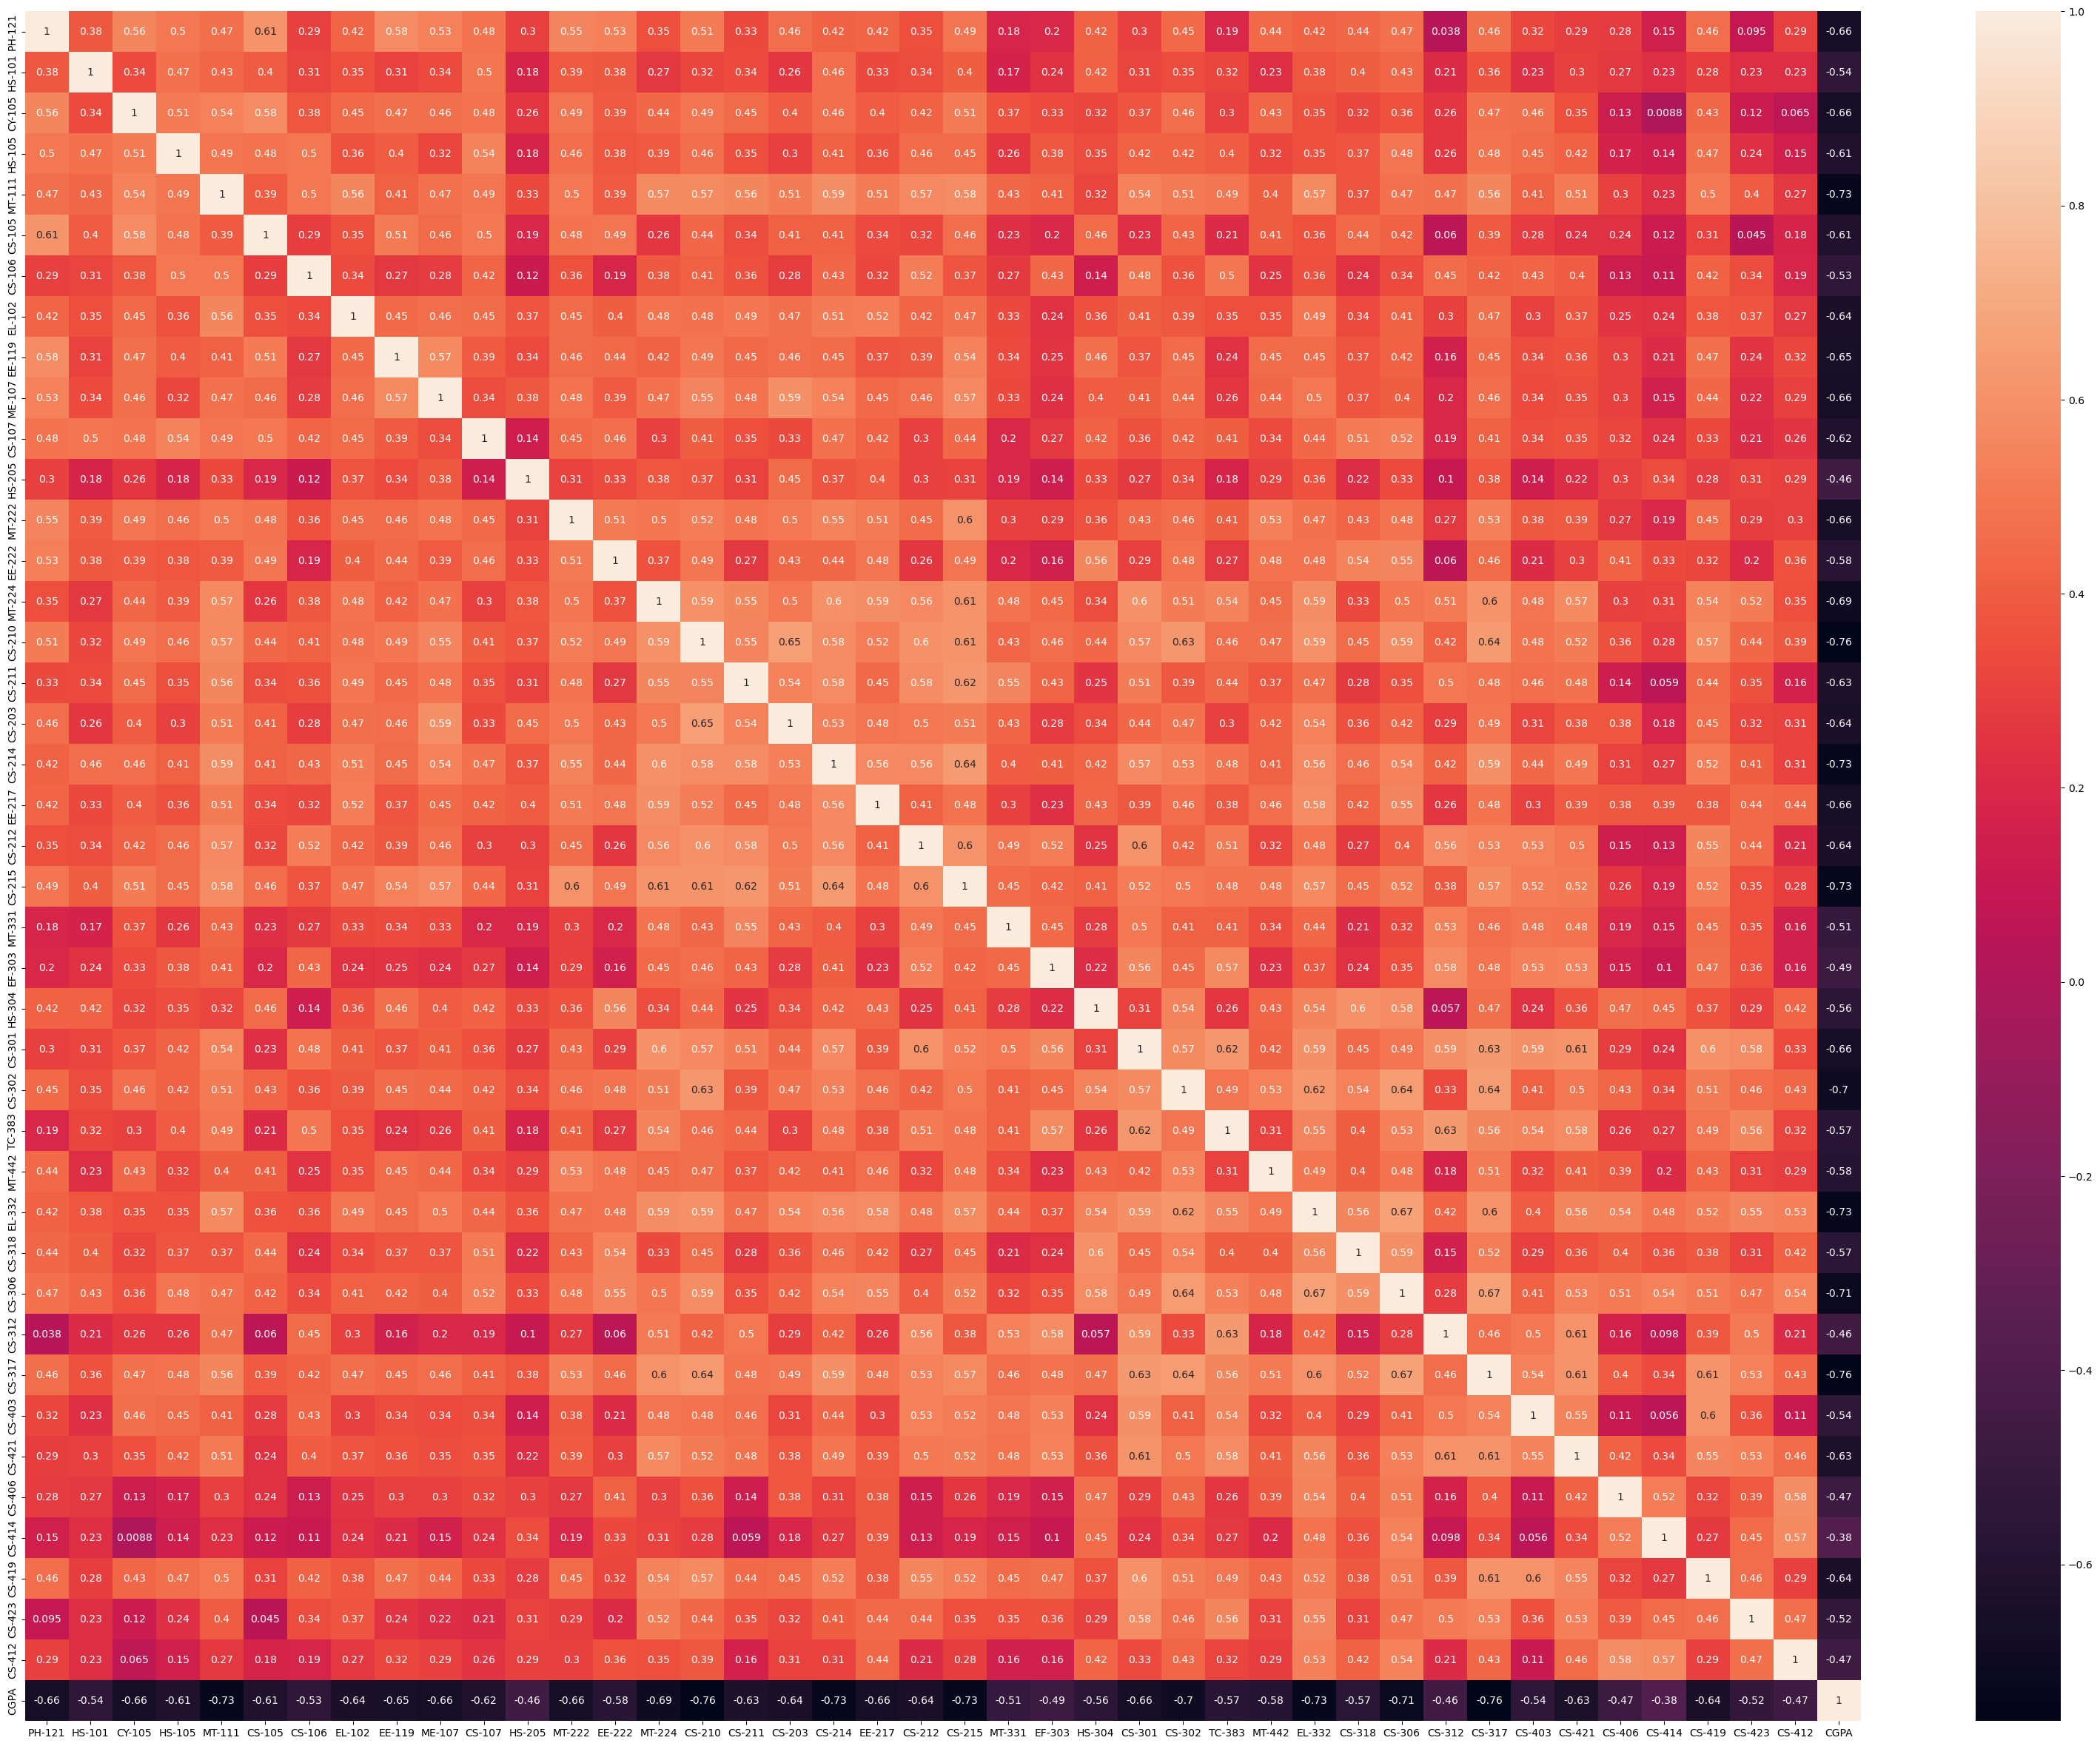

In [22]:
plt.figure(figsize=(40,30))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [24]:
#We see that all subjects are positively related among each other as all of them are important for better CGPA

Since our original data is object in nature , data cant be judged for outliers or skewness


In [25]:
#MODEL BUILDING

In [27]:
X=new_df.drop(columns=['CGPA'],axis=1)
X

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [36]:
y=new_df['CGPA']
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [29]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.416667,0.909091,0.666667,0.500000,0.666667,1.0,0.750000,0.666667,0.454545,0.666667,...,0.500000,0.615385,0.727273,0.8,0.666667,0.153846,0.000000,0.727273,0.272727,0.166667
1,0.000000,0.818182,0.833333,0.750000,0.416667,0.6,0.750000,0.000000,0.909091,0.750000,...,0.750000,0.769231,0.818182,0.6,0.750000,0.153846,0.416667,0.545455,0.545455,0.250000
2,0.000000,0.272727,0.000000,0.416667,0.333333,0.0,0.416667,0.333333,0.181818,0.166667,...,0.166667,0.230769,0.272727,0.0,0.500000,0.000000,0.000000,0.000000,0.181818,0.000000
3,0.750000,0.636364,0.833333,0.750000,0.750000,0.2,0.833333,0.666667,0.818182,0.583333,...,0.666667,0.769231,0.545455,1.0,0.666667,0.384615,0.250000,0.636364,0.636364,0.583333
4,0.166667,0.181818,0.166667,0.333333,0.000000,0.0,0.166667,0.333333,0.000000,0.166667,...,0.166667,0.384615,0.363636,0.4,0.416667,0.153846,0.000000,0.181818,0.181818,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.250000,0.000000,0.000000,0.166667,0.083333,0.0,0.166667,0.166667,0.090909,0.333333,...,0.333333,0.153846,0.181818,0.0,0.000000,0.000000,0.333333,0.363636,0.272727,0.000000
567,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,...,0.166667,0.307692,0.363636,0.0,0.000000,0.153846,0.250000,0.181818,0.545455,0.166667
568,0.250000,0.000000,0.166667,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,...,0.333333,0.153846,0.272727,0.0,0.333333,0.000000,0.500000,0.363636,0.181818,0.166667
569,0.000000,0.363636,0.750000,0.000000,0.750000,1.0,0.416667,0.666667,0.454545,0.666667,...,0.333333,0.692308,0.272727,0.3,0.666667,0.692308,0.500000,0.272727,0.454545,0.500000


In [33]:
lr=LinearRegression()

In [37]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model perform very well')
        print('Random State = ',i)
        print("Training r2_score is = ",r2_score(y_train,pred_train))
        print("Test r2_score is = ",r2_score(y_test,pred_test))
        print('\n')


At random state 63 The model perform very well
Random State =  63
Training r2_score is =  0.9294529324234269
Test r2_score is =  0.9286581044339474


At random state 322 The model perform very well
Random State =  322
Training r2_score is =  0.9276191077159899
Test r2_score is =  0.9280439258348243


At random state 378 The model perform very well
Random State =  378
Training r2_score is =  0.9292393416180582
Test r2_score is =  0.928904762328384


At random state 498 The model perform very well
Random State =  498
Training r2_score is =  0.9292380665996508
Test r2_score is =  0.9289632248196225


At random state 565 The model perform very well
Random State =  565
Training r2_score is =  0.9283146415220901
Test r2_score is =  0.9284620173537439


At random state 649 The model perform very well
Random State =  649
Training r2_score is =  0.9292570949084772
Test r2_score is =  0.9288752220716022


At random state 777 The model perform very well
Random State =  777
Training r2_score is = 

In [35]:
#we see that Random State 777 has least difference so we will use 777

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=777,test_size=0.25)

In [39]:
print(y.shape,y_train.shape,y_test.shape)

(571,) (428,) (143,)


In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [43]:
print(f'Regression Performance',{lr.score(x_test,y_test)},f'Regression Performance thru SVM',{svm.score(x_test,y_test)},f'Regression Performance thru RF',{rf.score(x_test,y_test)},f'Regression Performance thru GBR',{gbr.score(x_test,y_test)})

Regression Performance {0.9290862798942409} Regression Performance thru SVM {0.921707478103311} Regression Performance thru RF {0.9453117962375523} Regression Performance thru GBR {0.9552059145932076}


In [44]:
#We see GBR is best perforimg

In [45]:
#TEST PREDICTION

In [46]:
gbr_model=gbr.predict(x_test)
gbr_model

array([3.68781917, 2.69152072, 3.7653991 , 3.47720105, 2.38694695,
       1.67143271, 3.73454915, 3.58820913, 2.85868016, 3.16437484,
       2.22930388, 2.49898216, 3.83380688, 3.62532986, 3.01475619,
       2.77342433, 2.83650383, 3.31344392, 3.25745864, 3.03368315,
       2.79294133, 3.28133149, 3.39963127, 3.60110661, 2.50024021,
       2.22424158, 3.13173304, 2.94571449, 2.8919827 , 2.90696442,
       3.92607908, 3.52968823, 3.84289954, 2.88038673, 2.92799447,
       2.39429281, 2.43638631, 3.55888968, 3.18157994, 3.11703478,
       2.99293927, 2.10673028, 2.17246054, 1.769069  , 3.68725764,
       2.82595653, 3.76983904, 2.83237674, 1.7351808 , 3.59431083,
       3.67747438, 2.74501196, 3.66963969, 3.31327231, 3.33537002,
       2.60054573, 1.91990684, 2.80489994, 2.83935223, 3.60723006,
       3.64375563, 2.24750442, 3.91380606, 2.50552078, 2.74843072,
       2.14252041, 3.34787195, 3.50857091, 3.84976811, 3.71673398,
       2.53333016, 1.9899664 , 2.7683409 , 2.3588325 , 3.03004

In [54]:
svm_model=svm.predict(x_test)
rf_model=rf.predict(x_test)
lr_model=lr.predict(x_test)

In [61]:
df1=pd.DataFrame({'Actual':y_test,'Gradient Boosting':gbr_model})
df1

,Actual,Gradient Boosting
419,3.765,3.687819
524,2.576,2.691521
566,3.798,3.765399
111,3.516,3.477201
132,2.407,2.386947
...,...,...
122,3.189,3.300033
337,2.488,2.447539
479,3.099,3.125854
393,2.793,2.671432


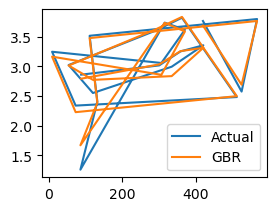

In [62]:
plt.subplot(221)#2X2 grid format
plt.plot(df1['Actual'].iloc[0:21],label='Actual')
plt.plot(df1['Gradient Boosting'].iloc[0:21],label='GBR')
plt.legend()

In [51]:
#MODEL ERROR

In [63]:
mae_lr_model=mean_absolute_error(y_test,lr_model)
mae_svm_model=mean_absolute_error(y_test,svm_model)
mae_rf_model=mean_absolute_error(y_test,rf_model)
mae_gbr_model=mean_absolute_error(y_test,gbr_model)
print(mae_lr_model,mae_svm_model,mae_rf_model,mae_gbr_model)

0.10477418503668107 0.09736671868878682 0.10500993006992998 0.08912430736808531


In [64]:
mse_lr_model=mean_squared_error(y_test,lr_model)
mse_svm_model=mean_squared_error(y_test,svm_model)
mse_rf_model=mean_squared_error(y_test,rf_model)
mse_gbr_model=mean_squared_error(y_test,gbr_model)
print(mse_lr_model,mse_svm_model,mse_rf_model,mse_gbr_model)

0.024397823219663977 0.026936495586584768 0.01881544397342653 0.015411378438637236


In [65]:
rmse_lr_model=np.sqrt(mean_squared_error(y_test,lr_model))
rmse_svm_model=np.sqrt(mean_squared_error(y_test,svm_model))
rmse_rf_model=np.sqrt(mean_squared_error(y_test,rf_model))
rmse_gbr_model=np.sqrt(mean_squared_error(y_test,gbr_model))
print(rmse_lr_model,rmse_svm_model,rmse_rf_model,rmse_gbr_model)

0.1561980256586618 0.16412341571690728 0.13716939882286622 0.12414257303051696


In [66]:
#We see that GBR has least loss/error

In [71]:
R_score=lr.score(X,y)*100
R_score

92.94485112568584

In [72]:
R_score=gbr.score(X,y)*100
R_score

98.68736967827938

In [73]:
#We see that GBR has highest R square which means that model can predict accuarate with GBR.

In [74]:
#To conclude, GBR should be used for future predictions.

In [75]:
#Thank You